In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import graspy as gp

/Users/j1c/miniconda3/envs/graspy/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.mixture.gaussian_mixture module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.mixture. Anything that cannot be imported from sklearn.mixture is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
res_df1 = pd.read_csv("../results/20200305_adj_row_wise.csv")
res_df1 = res_df1[res_df1.delta != 0]
res_df1 = res_df1.sort_values(['m', 'delta'])
res_df1 = res_df1[res_df1.m <= 250]

In [3]:
res_df = pd.read_csv("../results/2020401_weighted_correct_nodes.csv")
res_df = res_df.sort_values(['m', 'delta'])
res_df = res_df[res_df.delta != 0]

Text(0.5, -0.02, 'Effect Size')

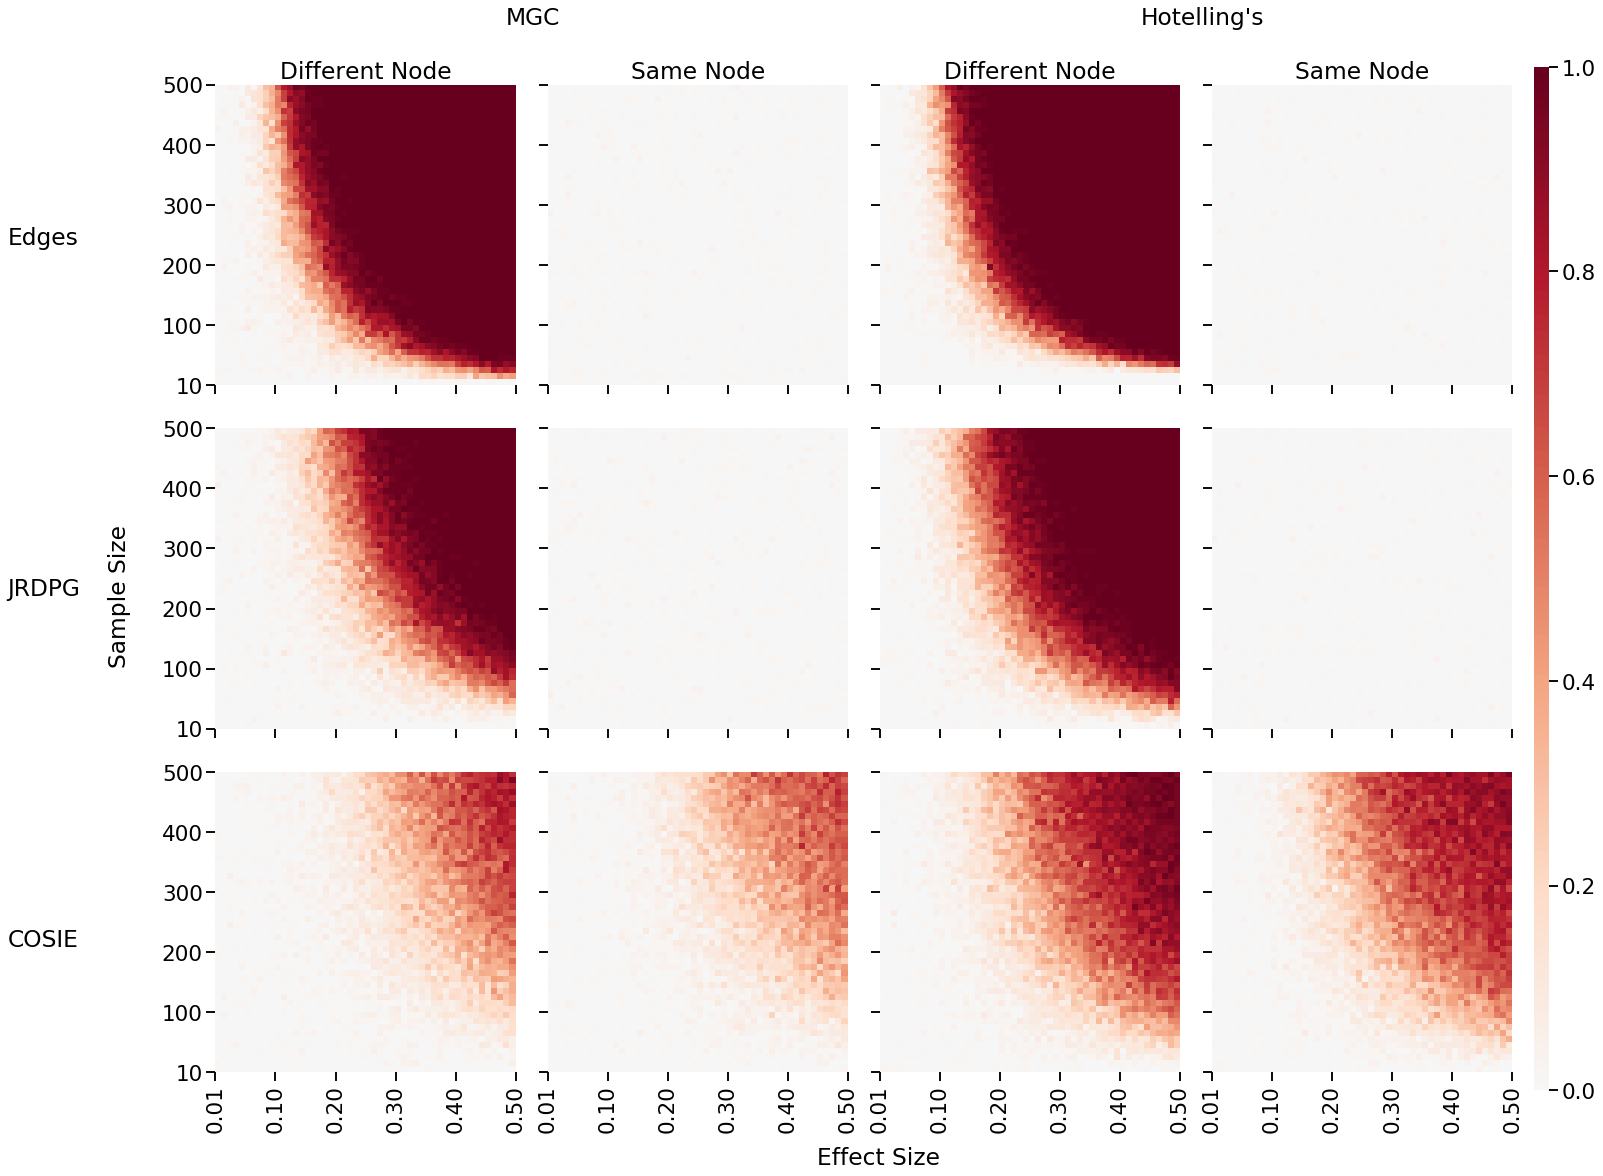

In [9]:
# Make figure with correct subplots
sns.set_context("talk", font_scale=1.3)
fig, ax = plt.subplots(
    3,
    5,
    gridspec_kw={"width_ratios": [1, 1, 1, 1, 0.05]},
    figsize=(20, 15),
    sharex=True,
    sharey=True,
    constrained_layout=True,
)
gs = ax[-1, -1].get_gridspec()
for ax_ in ax[:, -1]:
    ax_.remove()

ax_leg = fig.add_subplot(gs[:, -1])


p = 0.5
spacing = 50
deltas = np.linspace(0, 1 - p, spacing + 1)[::10]
deltas[0] += 0.01
ms = np.linspace(0, 250, spacing + 1)[::10] * 2
ms[0] += 10

titles = [
    ["Different Node", "Same Node", "Different Node", "Same Node"],
    ["Different Node", "Same Node", "Different Node", "Same Node"],
]

# Do first row
df_cols = [
    "mgc_node_1", "mgc_node_20", "hotelling_node_1", "hotelling_node_20"
]

for j, df_col in enumerate(df_cols):
    sns.heatmap(
        np.flipud(res_df1[df_col].values.reshape(spacing, -1)),
        ax=ax[0, j],
        square=True,
        center=0,
        cmap="RdBu_r",
        cbar_kws=dict(shrink=0.7),
        xticklabels=["{:.2f}".format(d) for d in deltas],
        yticklabels=["{:.0f}".format(m) for m in ms],
        cbar_ax=ax_leg,
        vmin=0,
        vmax=1,
    )
    ax[0, j].set_xticks(np.arange(0, ax[0, 0].get_xlim()[1] + 1, 10))
    ax[0, j].set_yticks(np.arange(0, ax[0, 0].get_ylim()[0] + 1, 10)[::-1])
    # if i != 0:
    #    ax[i, j].yaxis.set_major_formatter(plt.NullFormatter())
    ax[0, j].set_title(titles[0][j])


# second and third row
# Plotting
df_cols = [
    ["omni_power_mgc_1",  "omni_power_mgc_20", "omni_power_hotelling_1", "omni_power_hotelling_20"],
    ["mase_power_mgc_1", "mase_power_mgc_20", "mase_power_hotelling_1", "mase_power_hotelling_20"],
]

fmt = lambda x: "{:.2f}".format(x)

for i, row in enumerate(df_cols, start=1):
    for j, df_col in enumerate(row):
        sns.heatmap(
            np.flipud(res_df[df_col].values.reshape(spacing, -1)),
            ax=ax[i, j],
            square=True,
            center=0,
            cmap="RdBu_r",
            cbar_kws=dict(shrink=0.7),
            xticklabels=["{:.2f}".format(d) for d in deltas],
            yticklabels=["{:.0f}".format(m) for m in ms],
            cbar_ax=ax_leg,
            vmin=0,
            vmax=1,
        )
        ax[i, j].set_xticks(np.arange(0, ax[0, 0].get_xlim()[1] + 1, 10))
        ax[i, j].set_yticks(np.arange(0, ax[0, 0].get_ylim()[0] + 1, 10)[::-1])
        # if i != 0:
        #    ax[i, j].yaxis.set_major_formatter(plt.NullFormatter())
        if i ==0:
            ax[i, j].set_title(titles[i][j])

fig.text(0.26, 1.035, "MGC", va="center", ha="center")
fig.text(0.725, 1.035, "Hotelling's", va="center", ha="center")
fig.text(-0.035, 0.5, "Sample Size", va="center", rotation="vertical")
# fig.text(-0.025, 0.175, "COSIE", va="center", rotation="vertical")
# fig.text(-0.025, 0.5, "JRDPG", va="center", rotation="vertical")
# fig.text(-0.025, 0.825, "Edges", va="center", rotation="vertical")
fig.text(-0.08, 0.175, "COSIE", ha="center")
fig.text(-0.08, 0.5, "JRDPG", ha="center")
fig.text(-0.08, 0.825, "Edges", ha="center")

fig.text(0.5, -0.02, "Effect Size", va="center", ha="center")

In [10]:
fig.savefig("exp7.png", dpi=300, bbox_inches='tight')
fig.savefig("exp7.pdf", dpi=300, bbox_inches='tight')